In [23]:
import pandas as pd



# Import Data From CSV And Use Describe function

In [24]:
dtype_specifications = {
    'OrderID': int,
    'CustomerID': int,
    'ProductID': int,
    'OrderDate': str,  # Keep as string for now, convert to datetime later if needed
    'Quantity': int,
    'Price': float,
    'City': str
}
data = pd.read_csv("data.csv",dtype=dtype_specifications)

data.describe()

,OrderID,CustomerID,ProductID,Quantity,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,105.562000,502.501000,5.585000,15.998860
std,288.819436,2.851366,1.115008,2.738663,6.030246
min,1.000000,101.000000,501.000000,1.000000,5.020000
25%,250.750000,103.000000,502.000000,3.000000,10.827500
50%,500.500000,106.000000,503.000000,6.000000,16.185000
75%,750.250000,108.000000,503.000000,8.000000,21.212500
max,1000.000000,110.000000,504.000000,10.000000,25.980000


# Display The Total Quantity Of Items Sold Each Month

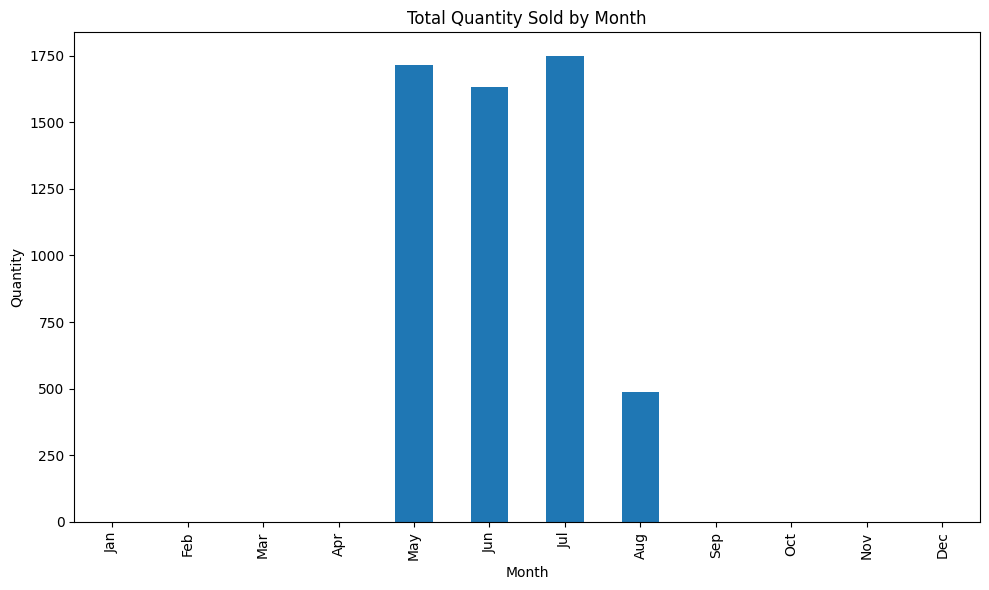

In [25]:
import matplotlib.pyplot as plt

data['OrderDate'] = pd.to_datetime(data['OrderDate'])

copy_data = data.copy()

# Calculate total quantity per month
copy_data['TotalQuantity'] = copy_data['Quantity']

# Group by month and sum the quantities
monthly_quantity = copy_data.groupby(data['OrderDate'].dt.month)['TotalQuantity'].sum()

# Filling months with no data as 0
monthly_quantity = monthly_quantity.reindex(range(1, 13), fill_value=0)  

# Convert month numbers to month names using appropriate indexing
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Mutate the DataFrame to match months index with their names
monthly_quantity.index = month_names

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total Quantity per Month as a bar chart
monthly_quantity.plot(kind='bar')
# Title for the Bar chart
plt.title('Total Quantity Sold by Month')
#Set label for X and Y axis
plt.xlabel('Month')
plt.ylabel('Quantity')
#Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()

# Find the Most Sold Product In July

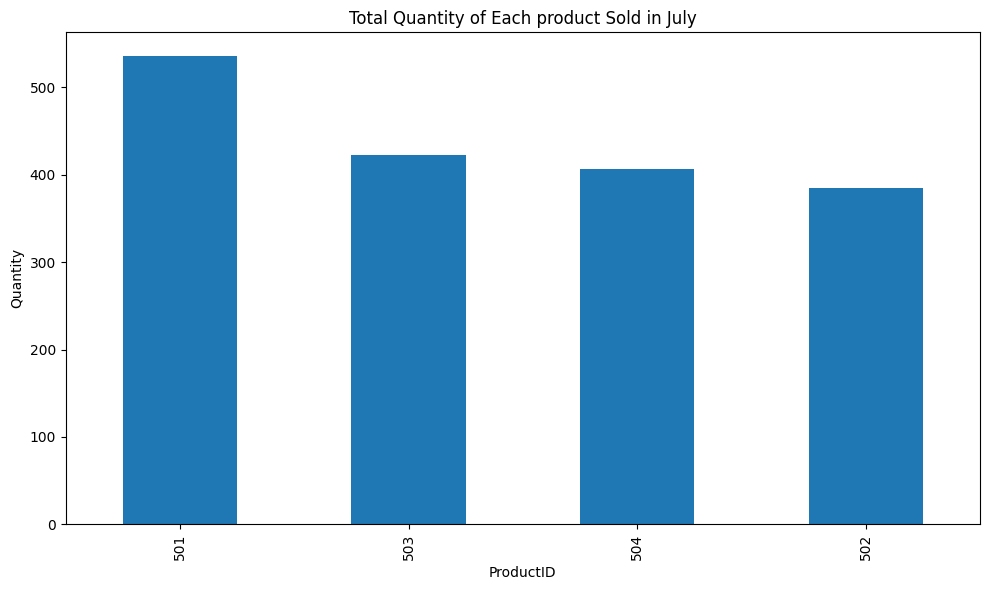

In [26]:
import matplotlib.pyplot as plt
# Ensure OrderDate is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
# create a copy of the data to prevent orignal Data from being possibly manipulated.
filtered_data = data[data['OrderDate'].dt.month == 7].copy()
# Calculate total Quantity per product 
quantity_per_product = filtered_data.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total spending per city as a bar chart
quantity_per_product.plot(kind='bar')
# Title for the Bar chart
plt.title('Total Quantity of Each product Sold in July')
#Set label for X and Y axis
plt.xlabel('ProductID')
plt.ylabel('Quantity')
#Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()


# Totol Spending For Cities In The Month Of June

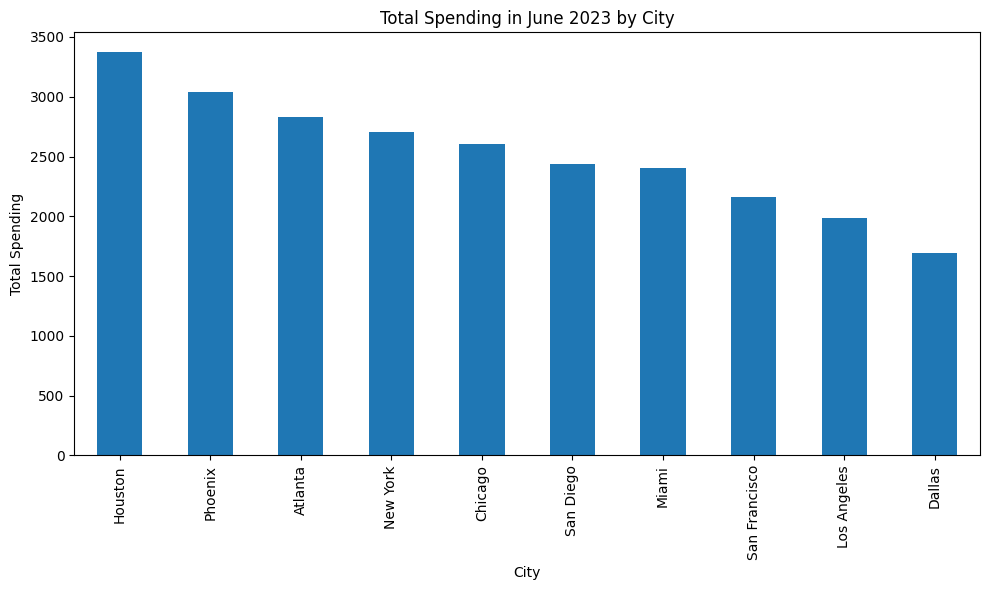

In [27]:
import matplotlib.pyplot as plt

# Ensure OrderDate is in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
# create a copy of the data to prevent orignal Data from being possibly manipulated.
filtered_data = data[data['OrderDate'].dt.month == 6].copy()
# Calculate total spending per city, 
filtered_data['TotalSpending'] = filtered_data['Price'] * filtered_data['Quantity']
spending_per_city = filtered_data.groupby('City')['TotalSpending'].sum().sort_values(ascending=False)

# Define the size of the Bar Graph
plt.figure(figsize=(10, 6))
# Plot the total spending per city as a bar chart
spending_per_city.plot(kind='bar')
# Title for the Bar chart
plt.title('Total Spending in June 2023 by City')
#Set label for X and Y axis
plt.xlabel('City')
plt.ylabel('Total Spending')
#Adjust spacing of the bars to ensure they fit in the Spacing defined
plt.tight_layout()

plt.show()